# **Детекция индивидуальных средств защиты**

In [ ]:
import os

In [ ]:
import zipfile
import time
from google.colab import drive
from PIL import Image

In [ ]:
# Подключаем гугл диск
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   28G   51G  36% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G   64K  6.4G   1% /var/colab
/dev/sda1       106G   82G   24G  78% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   13G  2.8G  82% /content/drive


In [ ]:
!ls /content/drive/"MyDrive"

 archive.zip			      'Макаренко Екатерина ИЦТМС 3-1_КоП2.docx'
'Colab Notebooks'		       Макаренко_лаб№7
 IMG_4827-ГУ.jpg		       Моделирование
 yolo_helmet_vest_detection.ipynb     'Новая таблица (1).gsheet'
 АОиПСП_Макаренко		      'Новая таблица.gsheet'
 Ведомость_1.xlsx		       Окко
 Городское_планирование.gdoc	       Оптимизация
 Датасеты.gsheet		       Оптимизация_Макаренко
 дз1.xlsx			       ПЗ_Системное_ИТог.docx
 Жеглова			       прапк.xlsx
'Задание '			      'рАЗВИТИЕ ГОРОДА'
 Задачи1-8.xlsx			       Риски.gsheet
 ИСТАС_3_3_КокинАС_Лаба7.docx	      'Скрины курсовой'
 ИЦТМС-3-1_КоП2_МакаренкоЕК.xlsx      'УЧЕБА В УНИВЕРЕ'
'Копия Макиша (надо проверить).docx'   ФОП.xlsx
 КР№2.xlsx			       ФОП_.xlsx
 КР_Макаренко_ЕК.docx		       Формы
 МакаренкоЕ_ИНЖ_СЕТИ


In [ ]:
# Прописываем путь к файлу с архивом
zip_file ='/content/drive/MyDrive/archive.zip'
# Распаковываем архив
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

print(os.listdir())

['.config', 'labels', 'images', 'drive', 'sample_data']


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO

In [ ]:
import yaml
dict_file = {
    'train': '/content/images/val',
    'val': '/content/images/test',
    'nc': 3,
    'names': ['helmet', 'vest', 'head',]}
with open('hard_head.yaml', 'w+') as file:
    documents = yaml.dump(dict_file, file)

In [ ]:
PATH_PRETRAINED = '/content/best.pt'
model = None

if not os.path.isfile(PATH_PRETRAINED):
    print("Предварительно обученные веса не найдены, используются веса по умолчанию")
    model = YOLO("yolov8s.pt")
else:
    print("Обнаружены предварительно обученные веса")
    model = YOLO(PATH_PRETRAINED)

Обнаружены предварительно обученные веса


In [ ]:
# Настройка гиперпараметров обучения
epochs = 65         # Количество эпох
batch = 16          # Размер батча
imgsz = 640         # Размер изображения

In [ ]:
# Обучение модели
results = model.train(
    data='hard_head.yaml',   # Указываем путь к YAML файлу конфигурации данных
    epochs=epochs,
    batch=batch,
    imgsz=imgsz,
    name='helmet_vest_detector',  # Имя для сохраненной модели
    pretrained=True,   # Используем предварительно обученные веса
    optimizer='auto'   # Используем автоматический выбор оптимизатора
)

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/best.pt, data=hard_head.yaml, epochs=65, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=helmet_vest_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 6.23M/6.23M [00:00<00:00, 133MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/labels/val... 2438 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2438/2438 [00:06<00:00, 371.37it/s]

train: New cache created: /content/labels/val.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/labels/test... 2455 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2456/2456 [00:07<00:00, 341.34it/s]

val: New cache created: /content/labels/test.cache


Plotting labels to runs/detect/helmet_vest_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/helmet_vest_detector
Starting training for 65 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/65      6.35G      1.781      1.658      1.321         14        640: 100%|██████████| 153/153 [01:16<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:39<00:00,  1.93it/s]


                   all       2456      20193      0.813       0.72      0.794      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/65      4.36G      1.514      1.001      1.172        166        640: 100%|██████████| 153/153 [01:03<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:39<00:00,  1.94it/s]


                   all       2456      20193      0.778      0.711      0.777      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/65      5.31G      1.506     0.9491      1.169        110        640: 100%|██████████| 153/153 [01:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:36<00:00,  2.10it/s]


                   all       2456      20193      0.786      0.709      0.783      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/65      5.21G      1.481     0.9263      1.152         25        640: 100%|██████████| 153/153 [01:08<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:35<00:00,  2.14it/s]


                   all       2456      20193      0.823      0.733      0.803      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/65      4.53G      1.486     0.9051      1.155        219        640: 100%|██████████| 153/153 [01:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:36<00:00,  2.10it/s]


                   all       2456      20193      0.786      0.768      0.816      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/65         5G      1.464       0.89      1.156        106        640: 100%|██████████| 153/153 [01:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:36<00:00,  2.11it/s]


                   all       2456      20193        0.8      0.739      0.801       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/65      5.41G      1.462     0.8711      1.151         44        640: 100%|██████████| 153/153 [01:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:36<00:00,  2.13it/s]


                   all       2456      20193       0.83      0.748      0.813      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/65      6.02G      1.456     0.8476      1.139        118        640: 100%|██████████| 153/153 [01:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:34<00:00,  2.26it/s]

                   all       2456      20193      0.808      0.737      0.792      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/65      5.11G      1.424     0.8354      1.142         92        640: 100%|██████████| 153/153 [01:03<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:35<00:00,  2.16it/s]


                   all       2456      20193      0.838      0.774      0.834      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/65      5.02G      1.431     0.8293      1.131        108        640: 100%|██████████| 153/153 [01:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:34<00:00,  2.25it/s]


                   all       2456      20193      0.851      0.775      0.853      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/65      5.41G      1.438      0.826      1.133         53        640: 100%|██████████| 153/153 [01:03<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:35<00:00,  2.18it/s]


                   all       2456      20193      0.843      0.779      0.838      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/65      5.79G      1.428     0.8169      1.124        145        640: 100%|██████████| 153/153 [01:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▍  | 57/77 [00:25<00:06,  2.97it/s]

In [ ]:
model.train(data="hard_head.yaml", epochs=65)

In [ ]:
# Сохранение модели
model.save('helmet_vest_detector.pt')

# Тестирование модели

In [ ]:
os.mkdir('/content/results')

In [ ]:
from io import BytesIO
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)

def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):

  if labels == []:
    labels = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}

  if colors == []:
    colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),(101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),(73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),(12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),(7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),(0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),(8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),(155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),(95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),(30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),(232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),(55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),(100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),(171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),(17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]

  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]

    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)


  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

def plot_results(results, image_path=None, image_data=None, result_name=None, box_type=False, labels=[]):
    for idx, result in enumerate(results):
        image = None
        if image_path:
            image = Image.open(image_path)
        else:
            image = image_data
        image = np.asarray(image)
        img = None
        if not box_type:
            boxes = result.boxes.data
            #conf = result.probs.top1
            img = plot_bboxes(image, boxes, labels=labels, score=True)
            #img = plot_bboxes(image, boxes, labels=labels, score=None)
        else:
            img = plot_bboxes(image, result, score=True)
        result_image_name = result_name if result_name else image_path.split('/')[-1]
        cv2.imwrite(f'/content/results/{result_image_name}', img)

In [ ]:
import IPython.display
test_images = os.listdir('/content/images/test')

In [ ]:
test_images[0]

'bPartB_00677.jpg'

### Детекция изображения по заданному индексу

In [ ]:
#for index
def predict_index(test_images, index):
    labels = {0: u'__background__', 1: u'helmet', 2: u'vest',3: u'head'}
    path = '/content/images/test/' + test_images[index]
    #results = model(path)


    results = model.predict(path)
    print("-----------")
    print(results[0].boxes)
    print("-----------")

    #results = [results]

    result_name = 'hardhat_pred_' + test_images[index]
    print(result_name)
    plot_results(results, image_path=path, labels=labels, result_name = result_name)
    time.sleep(1)
    return IPython.display.Image("/content/results/" + result_name)


image 1/1 /content/images/test/bPartB_00677.jpg: 640x640 4 heads, 27.6ms
Speed: 6.4ms preprocess, 27.6ms inference, 1360.0ms postprocess per image at shape (1, 3, 640, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2.], device='cuda:0')
conf: tensor([0.8813, 0.8578, 0.7809, 0.5691], device='cuda:0')
data: tensor([[ 51.9801,   6.0013, 191.4817, 215.8059,   0.8813,   2.0000],
        [213.8282,  54.9329, 296.4800, 206.6565,   0.8578,   2.0000],
        [342.2126,  43.5899, 423.6868, 219.2921,   0.7809,   2.0000],
        [ 10.0266,  16.1422,  73.5236, 129.0860,   0.5691,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([4, 6])
xywh: tensor([[121.7309, 110.9036, 139.5016, 209.8046],
        [255.1541, 130.7947,  82.6518, 151.7236],
        [382.9497, 131.4410,  81.4742, 175.7022],
        [ 41.7751,  72.6141,  63.4970, 112.9438]], device='cuda:0')
xywhn: tensor([[0.1902, 0.1733, 0.2180, 0.3

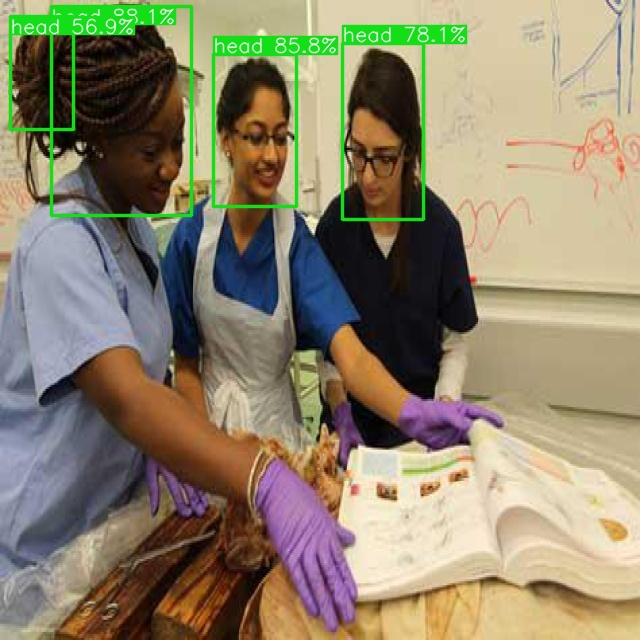

In [ ]:
predict_index(test_images,0)


image 1/1 /content/images/test/pos_1046.jpg: 640x640 2 helmets, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.7904, 0.7242], device='cuda:0')
data: tensor([[191.9639, 159.2993, 320.7211, 259.0200,   0.7904,   0.0000],
        [  0.0000,  93.7608,  39.6159, 160.8323,   0.7242,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[256.3425, 209.1597, 128.7572,  99.7207],
        [ 19.8080, 127.2965,  39.6159,  67.0715]], device='cuda:0')
xywhn: tensor([[0.4005, 0.3268, 0.2012, 0.1558],
        [0.0309, 0.1989, 0.0619, 0.1048]], device='cuda:0')
xyxy: tensor([[191.9639, 159.2993, 320.7211, 259.0200],
        [  0.0000,  93.7608,  39.6159, 160.8323]], device='cuda:0')
xyxyn: tensor([[0.2999, 0.2489, 0.5011, 0.4047],
        [0.0000, 0.1465, 0.061

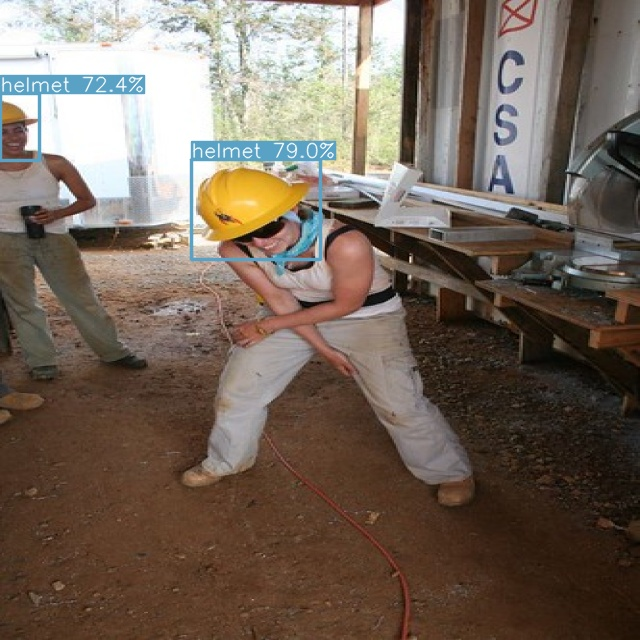

In [ ]:
predict_index(test_images, 200)


image 1/1 /content/images/test/bpart2_001092.jpg: 640x640 1 helmet, 1 vest, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 1.], device='cuda:0')
conf: tensor([0.8245, 0.7519], device='cuda:0')
data: tensor([[273.1404,  55.7770, 343.0951, 248.6381,   0.8245,   0.0000],
        [215.9653, 255.0300, 380.5566, 640.0000,   0.7519,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[308.1177, 152.2076,  69.9547, 192.8611],
        [298.2609, 447.5150, 164.5913, 384.9700]], device='cuda:0')
xywhn: tensor([[0.4814, 0.2378, 0.1093, 0.3013],
        [0.4660, 0.6992, 0.2572, 0.6015]], device='cuda:0')
xyxy: tensor([[273.1404,  55.7770, 343.0951, 248.6381],
        [215.9653, 255.0300, 380.5566, 640.0000]], device='cuda:0')
xyxyn: tensor([[0.4268, 0.0872, 0.5361, 0.3885],
        [0.3374, 0

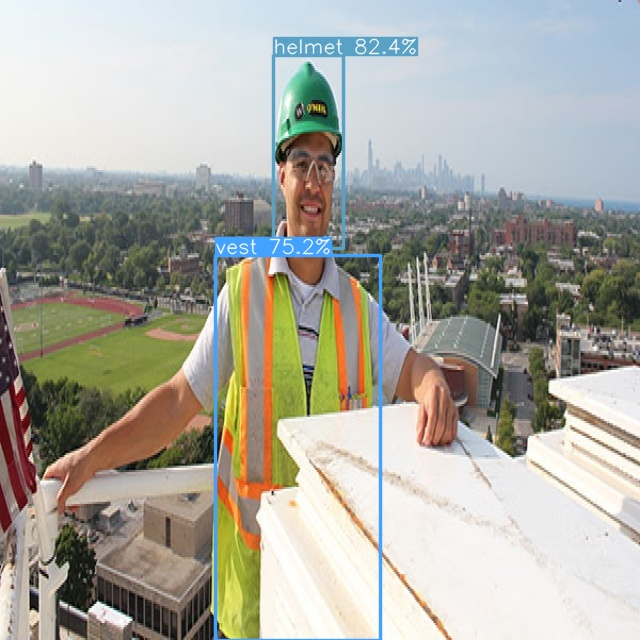

In [ ]:
predict_index(test_images, 300)


image 1/1 /content/images/test/b001463.jpg: 640x640 1 helmet, 16.3ms
Speed: 1.5ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.4498], device='cuda:0')
data: tensor([[2.3060e+01, 0.0000e+00, 6.4000e+02, 6.1080e+02, 4.4980e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[331.5298, 305.3995, 616.9404, 610.7991]], device='cuda:0')
xywhn: tensor([[0.5180, 0.4772, 0.9640, 0.9544]], device='cuda:0')
xyxy: tensor([[ 23.0596,   0.0000, 640.0000, 610.7991]], device='cuda:0')
xyxyn: tensor([[0.0360, 0.0000, 1.0000, 0.9544]], device='cuda:0')
-----------
hardhat_pred_b001463.jpg


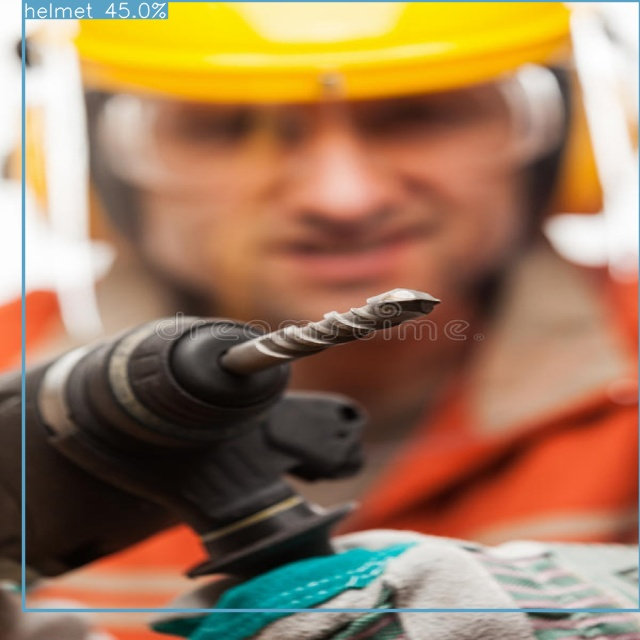

In [ ]:
predict_index(test_images, 400)

### Детекция изображения по названиюу

In [ ]:
def predict_name(test_image):
    labels = {0: u'__background__', 1: u'helmet', 2: u'vest',3: u'head'}
    path = '/content/images/test/' + test_image

    results = model.predict(path)
    print("-----------")
    print(results[0].boxes)
    print("-----------")

    result_name = 'hardhat_pred_' + test_image
    print(result_name)
    plot_results(results, image_path=path, labels=labels, result_name = result_name)
    time.sleep(1)
    return IPython.display.Image("/content/results/" + result_name)

In [ ]:
predict_name('Самолет_3.jpg')

FileNotFoundError: /content/images/test/Самолет_3.jpg does not exist


image 1/1 /content/images/test/camera_1.jpg: 384x640 1 helmet, 159.7ms
Speed: 8.6ms preprocess, 159.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.5940], device='cuda:0')
data: tensor([[4.5954e+02, 8.8421e+02, 4.8921e+02, 9.2384e+02, 5.9397e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[474.3740, 904.0274,  29.6697,  39.6302]], device='cuda:0')
xywhn: tensor([[0.2471, 0.8371, 0.0155, 0.0367]], device='cuda:0')
xyxy: tensor([[459.5392, 884.2123, 489.2089, 923.8425]], device='cuda:0')
xyxyn: tensor([[0.2393, 0.8187, 0.2548, 0.8554]], device='cuda:0')
-----------
hardhat_pred_camera_1.jpg


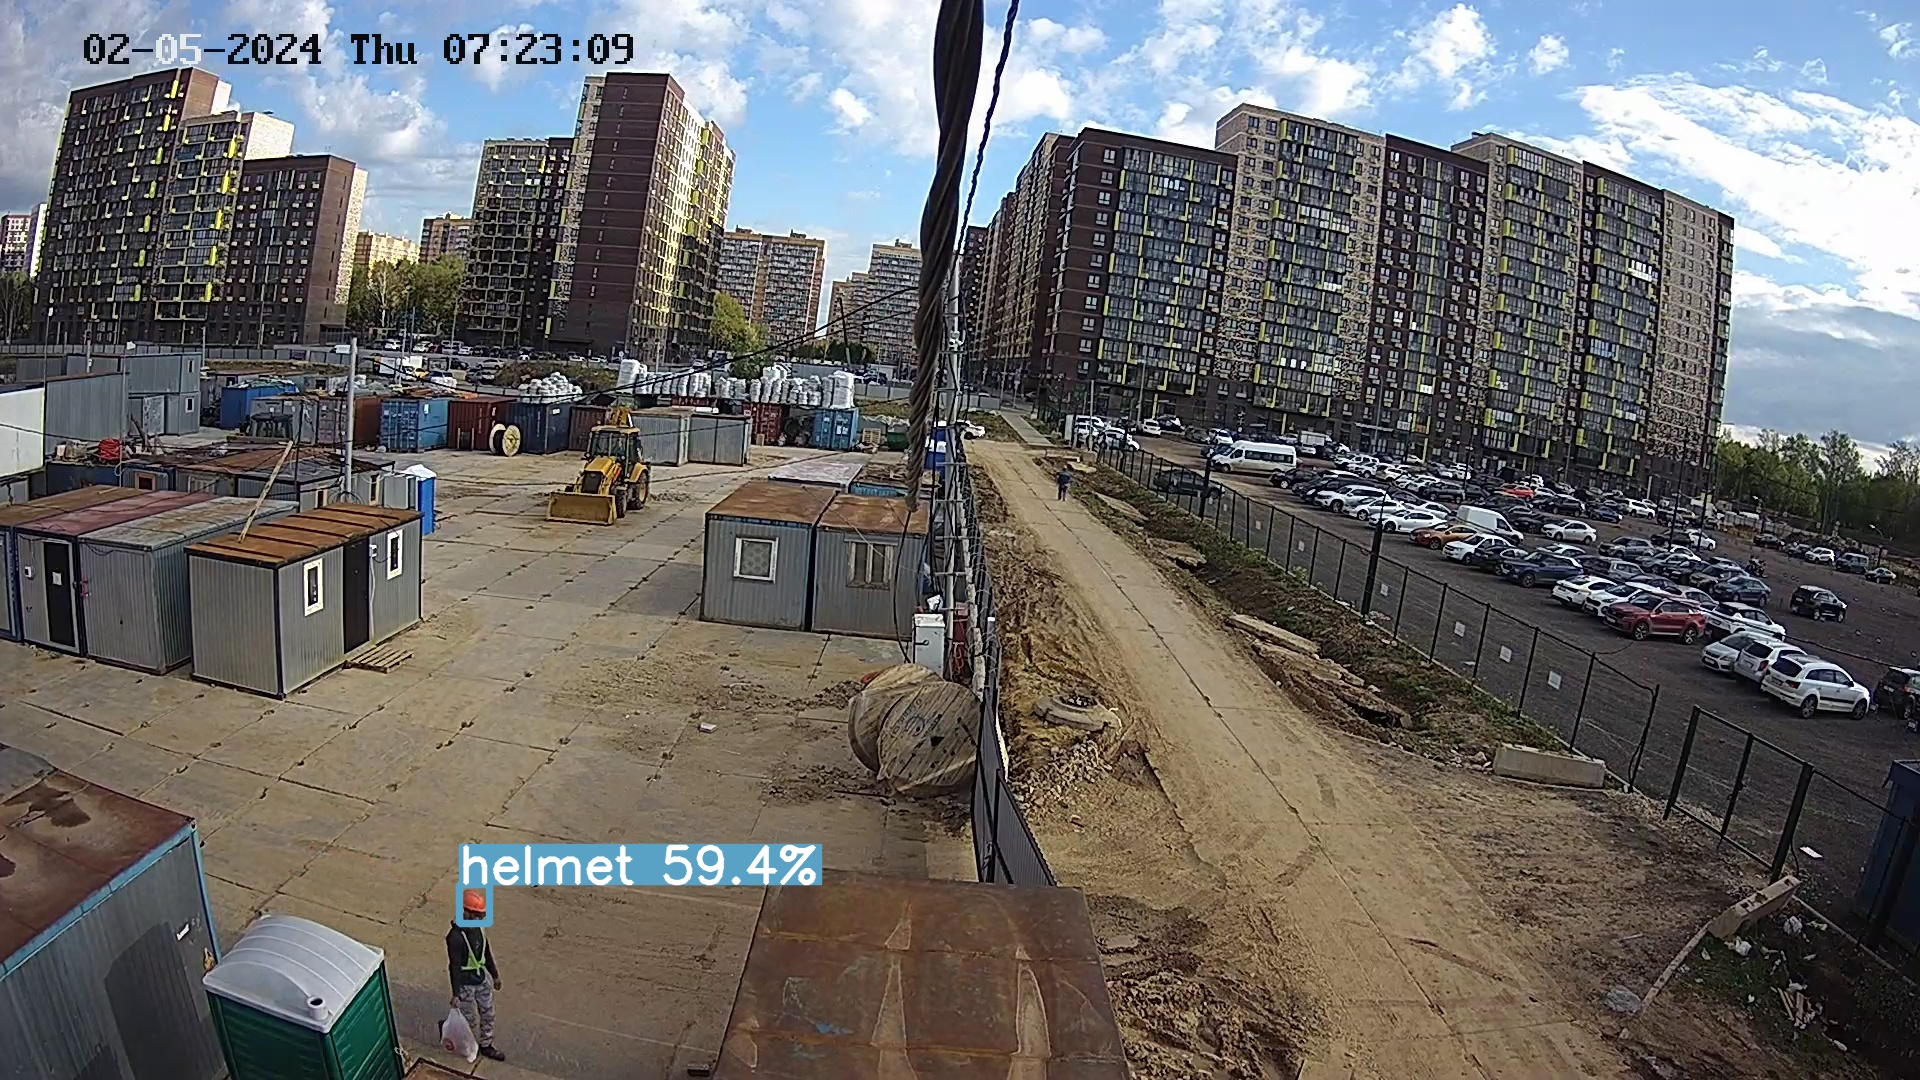

In [ ]:
predict_name('camera_1.jpg')

Разрезаем картинку для улучшения качества

In [ ]:
from PIL import Image

def split_image(image_path):
    # Открываем изображение
    img = Image.open(image_path)
    width, height = img.size

    # Разделяем изображение на 4 части
    part_width = width // 2
    part_height = height // 2

    # Сохраняем каждую часть как новое изображение
    for i in range(2):
        for j in range(2):
            box = (j * part_width, i * part_height, (j + 1) * part_width, (i + 1) * part_height)
            part = img.crop(box)
            part.save(f"part_{i + 1}_{j + 1}.jpg")

In [ ]:
# Вызываем функцию для разделения изображения
split_image("/content/images/test/camera_1.jpg")

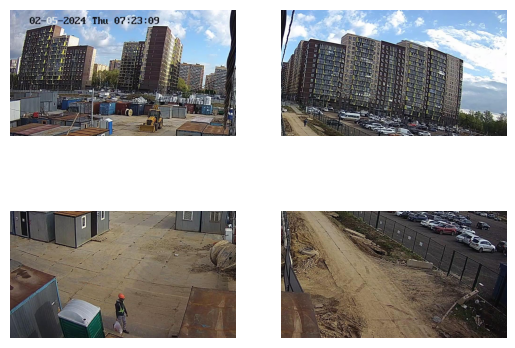

In [ ]:
import matplotlib.pyplot as plt
# Отображаем все 4 изображения
for i in range(1, 3):
    for j in range(1, 3):
        img = plt.imread(f"part_{i}_{j}.jpg")
        plt.subplot(2, 2, (i - 1) * 2 + j)
        plt.imshow(img)
        plt.axis('off')
plt.show()

In [ ]:
from PIL import Image
import os

def split_image(image_path):
    # Создаем папку "split", если она еще не существует
    if not os.path.exists("split"):
        os.makedirs("split")

    # Открываем изображение
    img = Image.open(image_path)
    width, height = img.size

    # Разделяем изображение на 4 части
    part_width = width // 2
    part_height = height // 2

    # Получаем название изначальной картинки
    basename = os.path.basename(image_path)
    filename, ext = os.path.splitext(basename)

    # Сохраняем каждую часть как новое изображение
    for i in range(2):
        for j in range(2):
            box = (j * part_width, i * part_height, (j + 1) * part_width, (i + 1) * part_height)
            part = img.crop(box)
            part_filename = f"{filename}_{i + 1}_{j + 1}{ext}"
            part_path = os.path.join("split", part_filename)
            part.save(part_path)



In [ ]:
# Вызываем функцию для разделения изображения
image_path = "/content/images/test/camera_1.jpg"
split_image(image_path)

In [ ]:
def predict_name_split(test_image):
    labels = {0: u'__background__', 1: u'helmet', 2: u'vest',3: u'head'}
    path = '/content/split/' + test_image

    results = model.predict(path)
    print("-----------")
    print(results[0].boxes)
    print("-----------")

    result_name = 'hardhat_pred_' + test_image
    print(result_name)
    plot_results(results, image_path=path, labels=labels, result_name = result_name)
    time.sleep(1)
    return IPython.display.Image("/content/results/" + result_name)


image 1/1 /content/split/camera_1_2_1.jpg: 384x640 1 helmet, 26.6ms
Speed: 13.2ms preprocess, 26.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.7210], device='cuda:0')
data: tensor([[457.7328, 346.5915, 489.0591, 386.9290,   0.7210,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (540, 960)
shape: torch.Size([1, 6])
xywh: tensor([[473.3959, 366.7603,  31.3262,  40.3376]], device='cuda:0')
xywhn: tensor([[0.4931, 0.6792, 0.0326, 0.0747]], device='cuda:0')
xyxy: tensor([[457.7328, 346.5915, 489.0591, 386.9290]], device='cuda:0')
xyxyn: tensor([[0.4768, 0.6418, 0.5094, 0.7165]], device='cuda:0')
-----------
hardhat_pred_camera_1_2_1.jpg


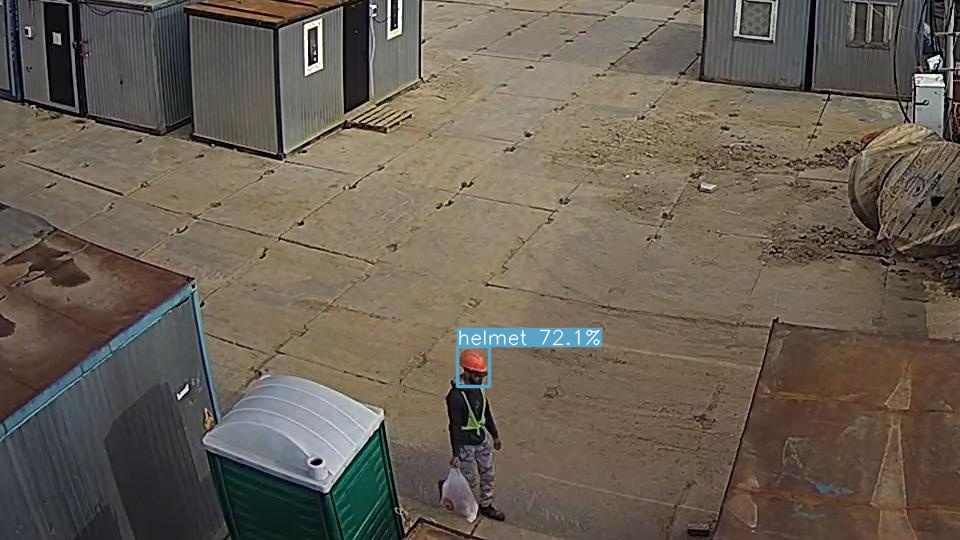

In [ ]:
predict_name_split('camera_1_2_1.jpg')


image 1/1 /content/split/11_2_2.jpg: 384x640 1 helmet, 11.8ms
Speed: 2.7ms preprocess, 11.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.2717], device='cuda:0')
data: tensor([[8.2030e+02, 2.0337e+02, 8.4350e+02, 2.2974e+02, 2.7174e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (540, 960)
shape: torch.Size([1, 6])
xywh: tensor([[831.9027, 216.5569,  23.2013,  26.3638]], device='cuda:0')
xywhn: tensor([[0.8666, 0.4010, 0.0242, 0.0488]], device='cuda:0')
xyxy: tensor([[820.3021, 203.3750, 843.5034, 229.7388]], device='cuda:0')
xyxyn: tensor([[0.8545, 0.3766, 0.8786, 0.4254]], device='cuda:0')
-----------
hardhat_pred_11_2_2.jpg


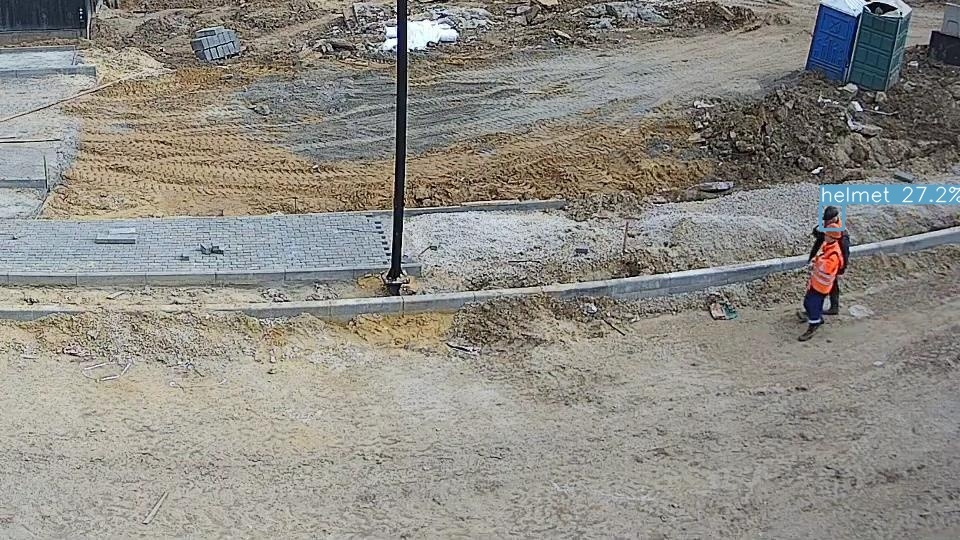

In [ ]:
predict_name_split('11_2_2.jpg')


image 1/1 /content/split/11_2_1.jpg: 384x640 (no detections), 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 20.9ms postprocess per image at shape (1, 3, 384, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (540, 960)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))
-----------
hardhat_pred_11_2_1.jpg


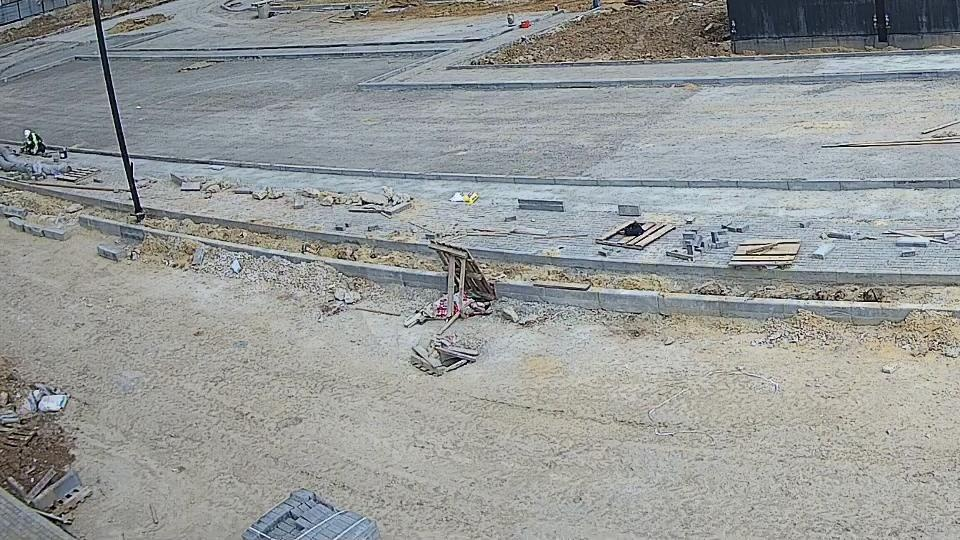

In [ ]:
predict_name_split('11_2_1.jpg')


image 1/1 /content/split/11_1_2.jpg: 384x640 (no detections), 12.7ms
Speed: 3.1ms preprocess, 12.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (540, 960)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))
-----------
hardhat_pred_11_1_2.jpg


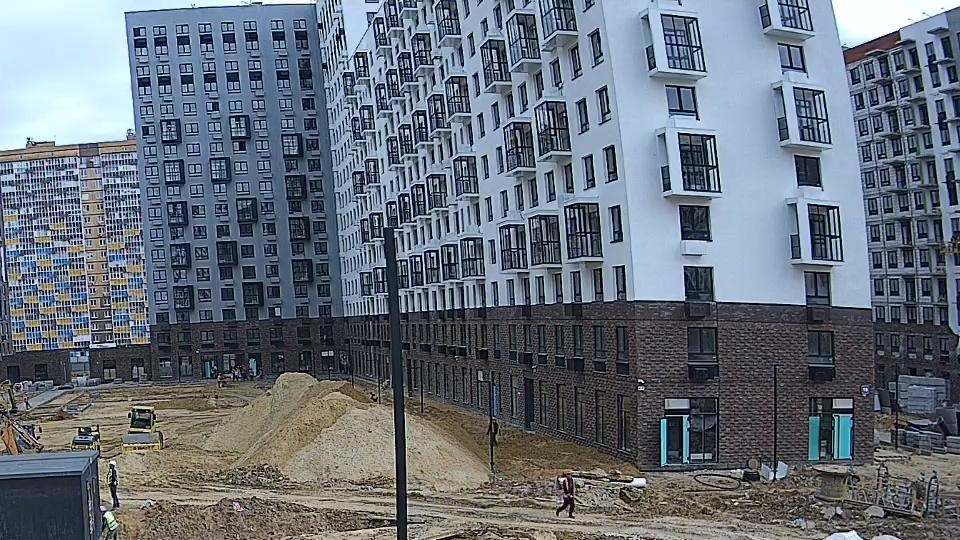

In [ ]:
predict_name_split('11_1_2.jpg')


image 1/1 /content/images/test/Самолет_1.jpg: 480x640 9 helmets, 5 vests, 73.0ms
Speed: 1.9ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.], device='cuda:0')
conf: tensor([0.8117, 0.8106, 0.8023, 0.8012, 0.7780, 0.7773, 0.7738, 0.7536, 0.7237, 0.7232, 0.6956, 0.6929, 0.6866, 0.6079], device='cuda:0')
data: tensor([[2.4125e+02, 4.4335e+02, 3.1166e+02, 5.2656e+02, 8.1167e-01, 0.0000e+00],
        [8.4315e+02, 4.2159e+02, 9.0998e+02, 5.0057e+02, 8.1064e-01, 0.0000e+00],
        [9.3558e+02, 5.3969e+02, 1.0211e+03, 7.0554e+02, 8.0229e-01, 1.0000e+00],
        [3.7933e+02, 4.5194e+02, 4.6931e+02, 5.6400e+02, 8.0120e-01, 0.0000e+00],
        [7.4445e+02, 5.4944e+02, 9.3420e+02, 8.7242e+02, 7.7803e-01, 1.0000e+00],
        [1.9000e+02, 5.2547e+02, 3.2109e+02, 7.2496e+02, 7.7731e-01, 1.0000e+00],
        [9.2161e+02, 4

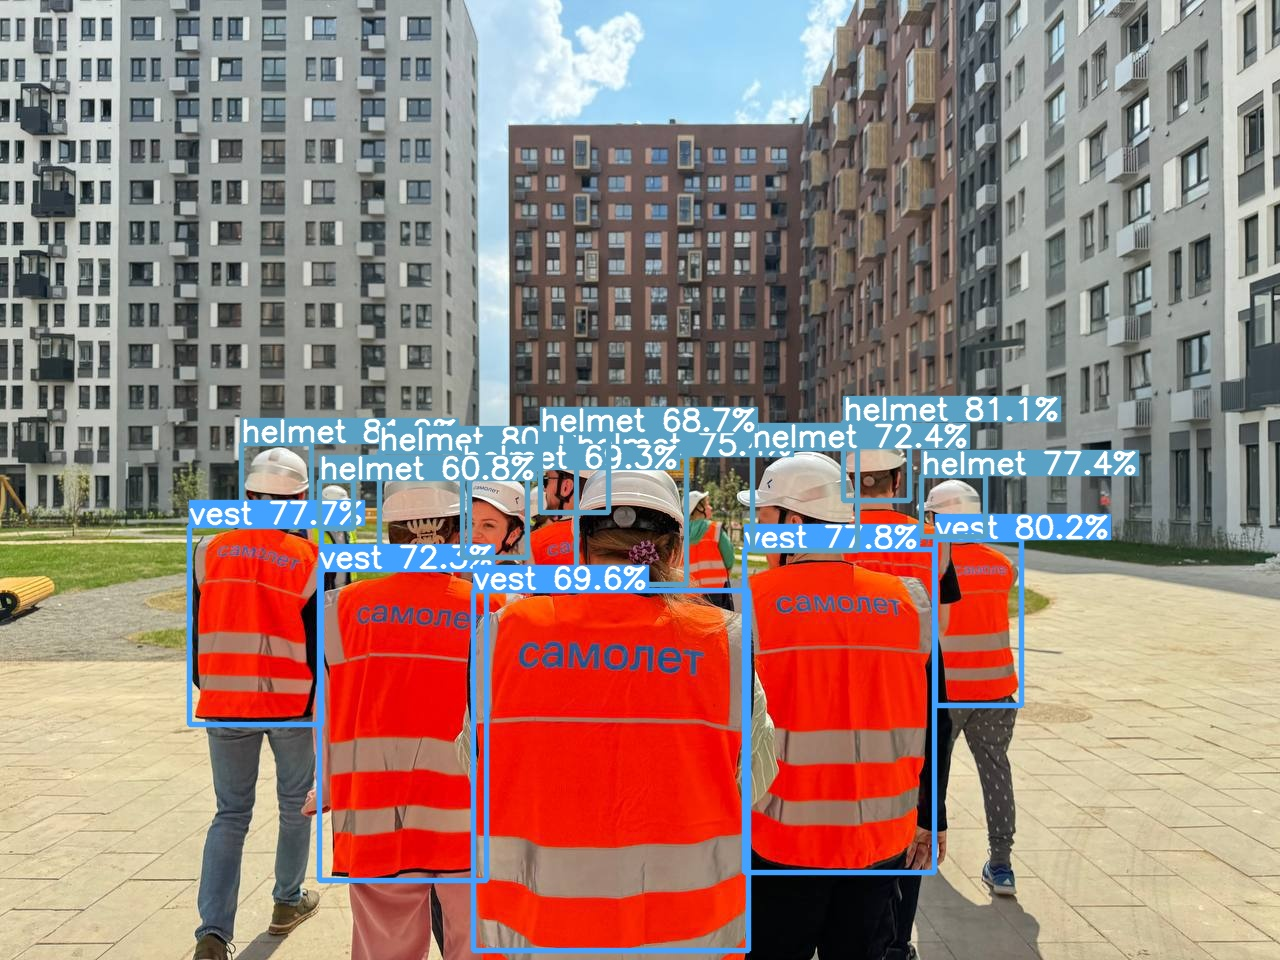

In [ ]:
predict_name('Самолет_1.jpg')


image 1/1 /content/images/test/Самолет_2.jpg: 640x480 1 helmet, 1 vest, 102.5ms
Speed: 7.6ms preprocess, 102.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 0.], device='cuda:0')
conf: tensor([0.8398, 0.7813], device='cuda:0')
data: tensor([[3.5426e+02, 7.0423e+02, 5.0275e+02, 9.4677e+02, 8.3981e-01, 1.0000e+00],
        [4.0467e+02, 6.1707e+02, 4.7153e+02, 7.0914e+02, 7.8132e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1280, 960)
shape: torch.Size([2, 6])
xywh: tensor([[428.5038, 825.5021, 148.4918, 242.5444],
        [438.0984, 663.1078,  66.8663,  92.0667]], device='cuda:0')
xywhn: tensor([[0.4464, 0.6449, 0.1547, 0.1895],
        [0.4564, 0.5181, 0.0697, 0.0719]], device='cuda:0')
xyxy: tensor([[354.2579, 704.2299, 502.7498, 946.7743],
        [404.6652, 617.0745, 471.5316, 709.1411]], device='cuda:0')
xyxyn: tensor([[0.3690, 0.5502, 0.5237, 0.73

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


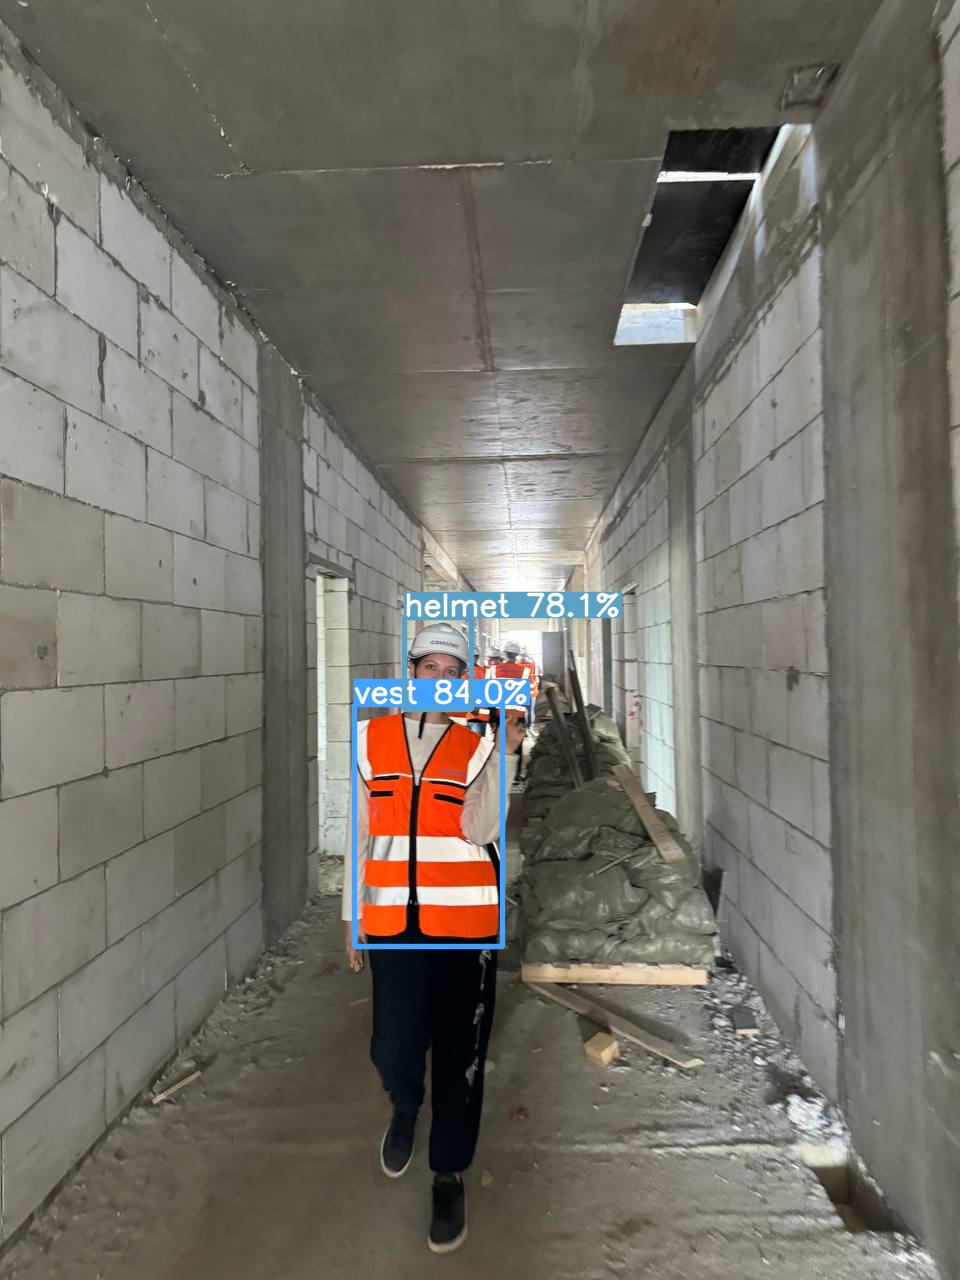

In [ ]:
predict_name('Самолет_2.jpg')


image 1/1 /content/images/test/Самолет_3.jpg: 480x640 8 helmets, 4 vests, 16.4ms
Speed: 2.6ms preprocess, 16.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.], device='cuda:0')
conf: tensor([0.8865, 0.8306, 0.8229, 0.8139, 0.7943, 0.7658, 0.7522, 0.6111, 0.5672, 0.5360, 0.5142, 0.4023], device='cuda:0')
data: tensor([[8.1415e+02, 1.9071e+02, 1.1371e+03, 6.0639e+02, 8.8654e-01, 0.0000e+00],
        [4.4242e+02, 2.4589e+02, 5.7276e+02, 4.1967e+02, 8.3058e-01, 0.0000e+00],
        [6.1798e+02, 1.3565e+02, 7.7098e+02, 3.6656e+02, 8.2290e-01, 0.0000e+00],
        [9.6269e-01, 2.0437e+02, 1.3313e+02, 5.2464e+02, 8.1386e-01, 0.0000e+00],
        [7.2844e+02, 5.5809e+02, 1.2779e+03, 9.5968e+02, 7.9431e-01, 1.0000e+00],
        [1.8744e+02, 3.4008e+02, 4.4719e+02, 8.0203e+02, 7.6580e-01, 1.0000e+00],
        [5.6321e+02, 1.5951e+02, 6.3505e+02, 2

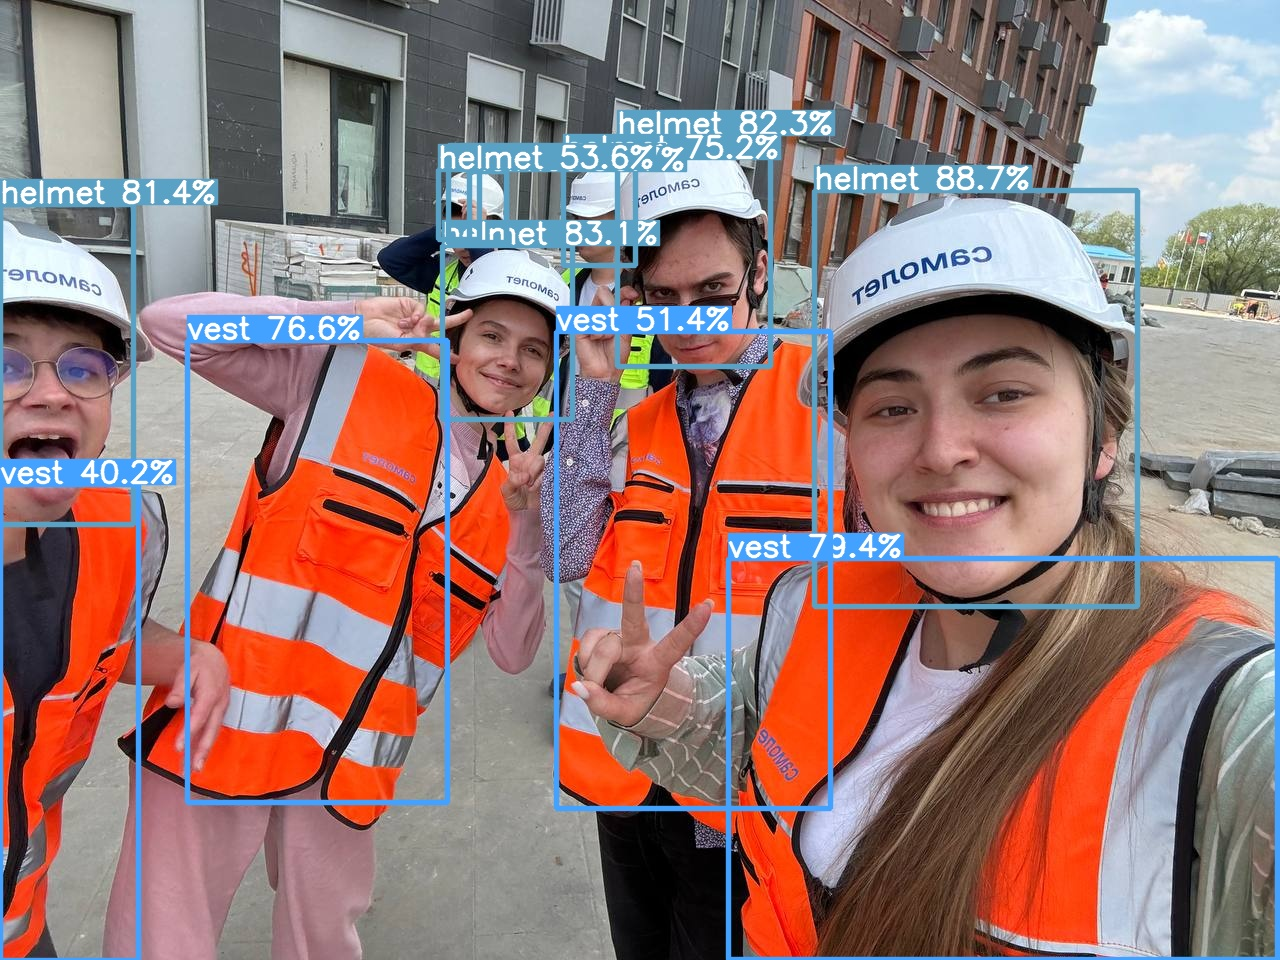

In [ ]:
predict_name('Самолет_3.jpg')


image 1/1 /content/images/test/Самолет_4.jpg: 640x480 9 helmets, 9 vests, 22.4ms
Speed: 2.7ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
-----------
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.], device='cuda:0')
conf: tensor([0.8515, 0.8513, 0.8438, 0.8316, 0.7669, 0.7635, 0.7572, 0.7403, 0.7127, 0.6995, 0.6748, 0.6008, 0.5628, 0.5405, 0.5249, 0.4357, 0.3582, 0.3511], device='cuda:0')
data: tensor([[4.9193e+02, 6.9433e+02, 6.2307e+02, 8.9852e+02, 8.5155e-01, 1.0000e+00],
        [6.6155e+02, 6.8689e+02, 9.1468e+02, 1.0541e+03, 8.5126e-01, 1.0000e+00],
        [3.7196e+02, 6.8928e+02, 4.6672e+02, 8.4237e+02, 8.4376e-01, 1.0000e+00],
        [1.4946e+02, 6.4937e+02, 2.0536e+02, 7.3001e+02, 8.3159e-01, 1.0000e+00],
        [2.4438e+02, 6.2876e+02, 2.9374e+02, 7.1339e+02, 7.6691e-01, 1.0000e+00],
        [2.8386e+02, 6.5581e+02, 3.2007e+02, 7.2207e+02,

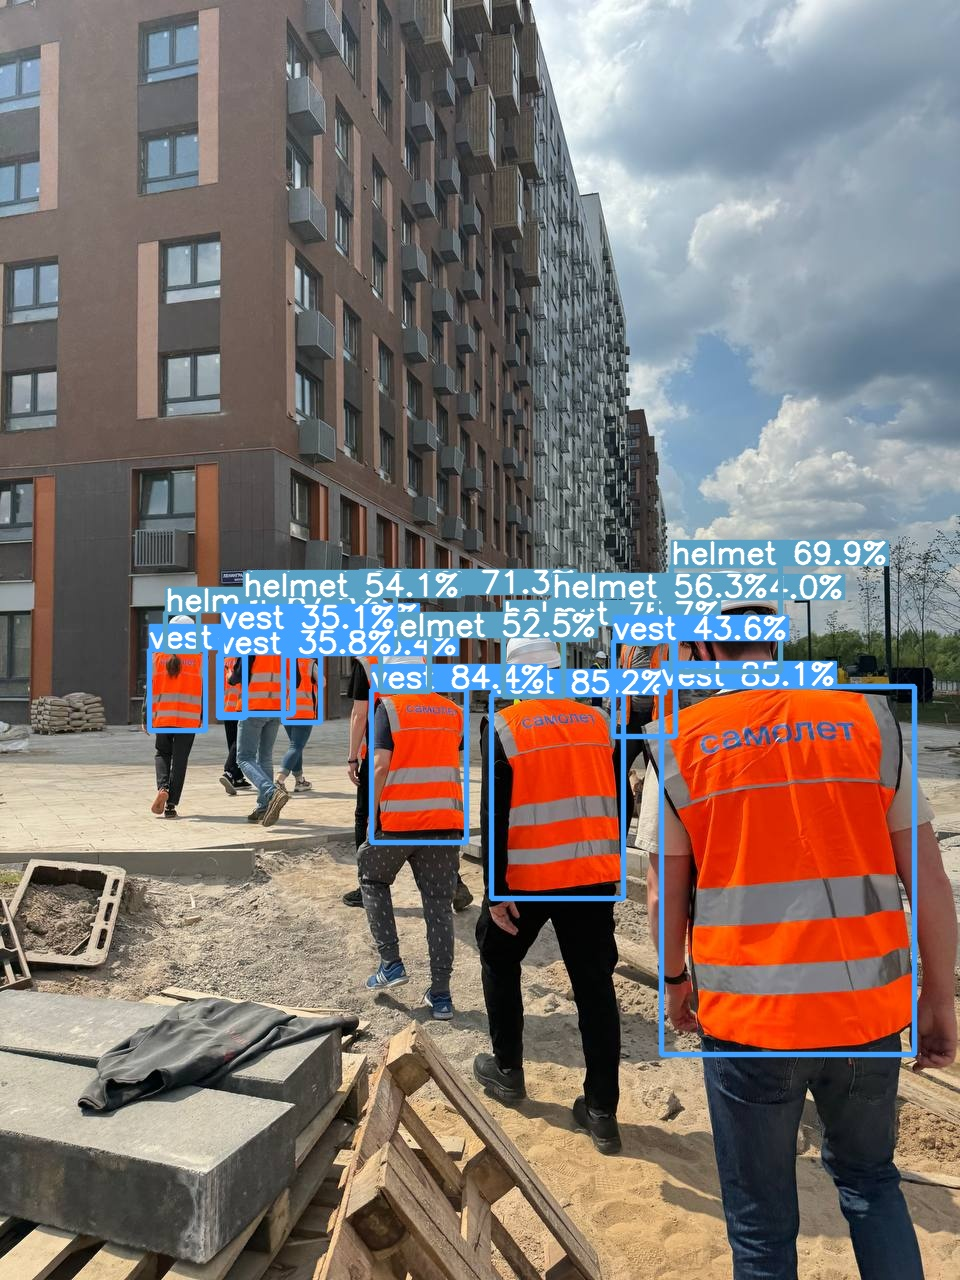

In [ ]:
predict_name('Самолет_4.jpg')

Построение графиков

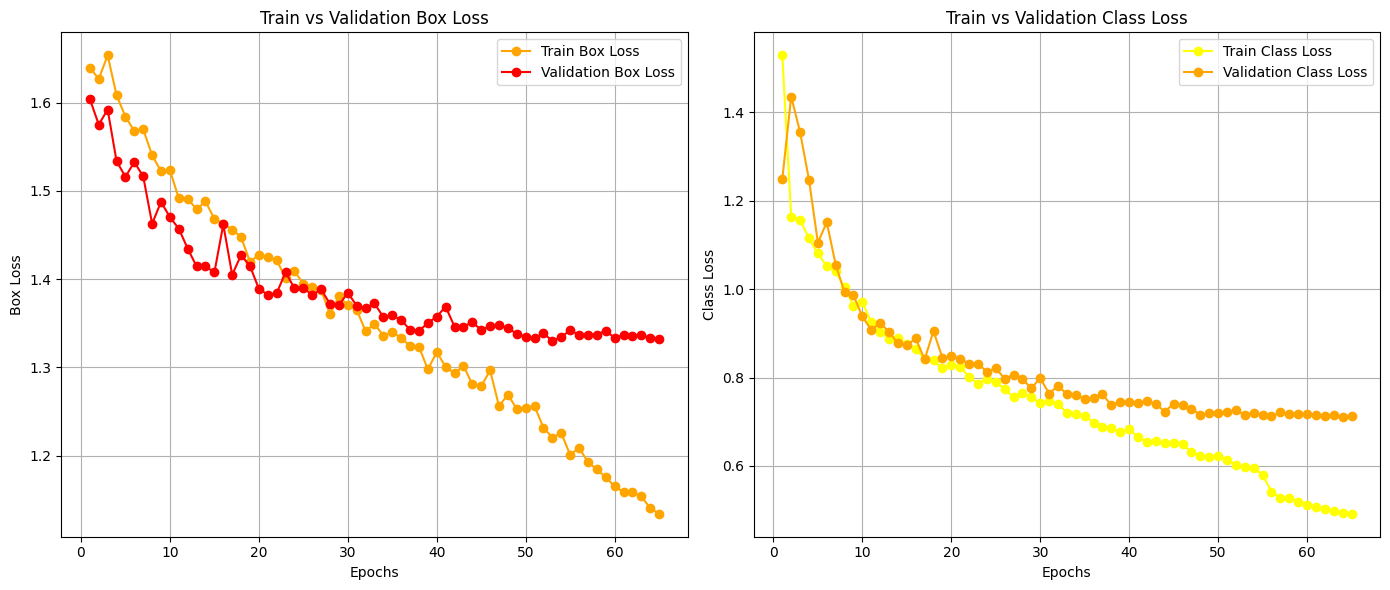

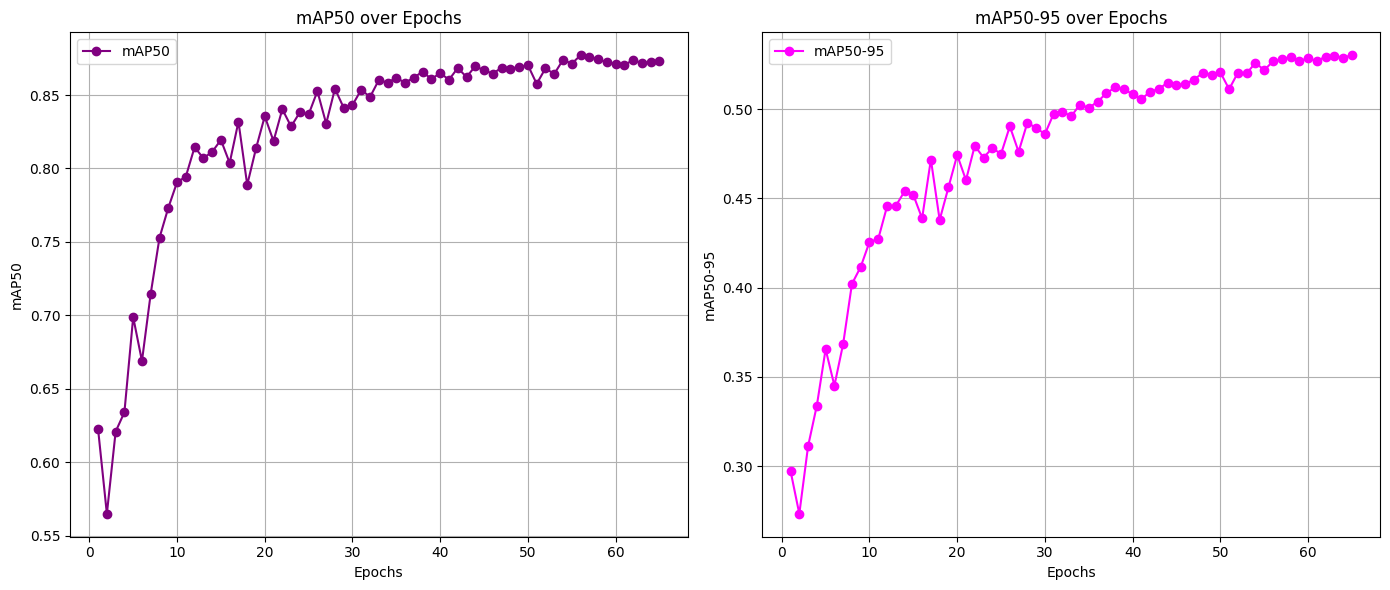

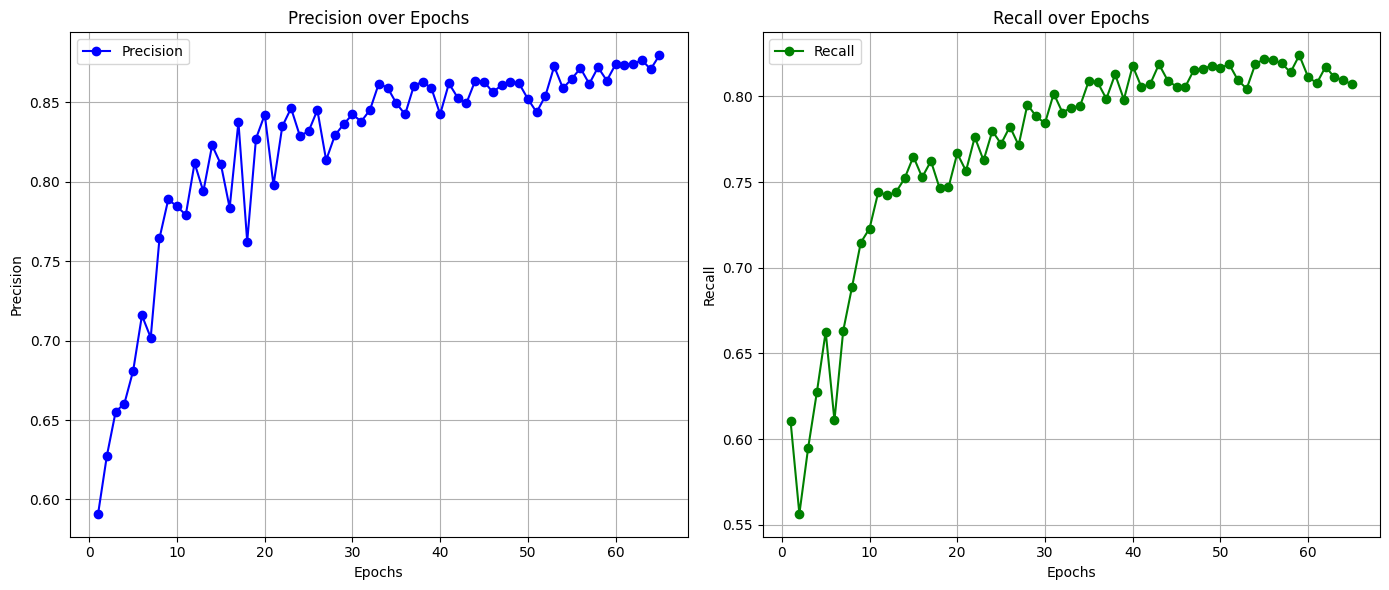

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/results.csv'
data = pd.read_csv(file_path)

# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Plotting the graphs

# Plot for Train vs Validation Box Loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(data['epoch'], data['train/box_loss'], label='Train Box Loss', color='orange', marker='o')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation Box Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Box Loss')
plt.title('Train vs Validation Box Loss')
plt.legend()
plt.grid(True)

# Plot for Train vs Validation Class Loss
plt.subplot(1, 2, 2)
plt.plot(data['epoch'], data['train/cls_loss'], label='Train Class Loss', color='yellow', marker='o')
plt.plot(data['epoch'], data['val/cls_loss'], label='Validation Class Loss', color='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Class Loss')
plt.title('Train vs Validation Class Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting mAP over epochs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP50', color='purple', marker='o')
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.title('mAP50 over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(data['epoch'], data['metrics/mAP50-95(B)'], label='mAP50-95', color='magenta', marker='o')
plt.xlabel('Epochs')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting Precision and Recall over epochs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(data['epoch'], data['metrics/precision(B)'], label='Precision', color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(data['epoch'], data['metrics/recall(B)'], label='Recall', color='green', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
